In [1]:
## importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics, preprocessing, model_selection, svm, tree, ensemble, linear_model

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('test_AbJTz2l.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
## Null dataset in the train
train.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
## Null dataset in the test
test.isna().sum() 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
## Only 2 fields has null value
## Analysing those 2 values

missing_data = ['Item_Weight', 'Outlet_Size']
train[missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  7060 non-null   float64
 1   Outlet_Size  6113 non-null   object 
dtypes: float64(1), object(1)
memory usage: 133.3+ KB


In [8]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
## Imputation of the missing data

train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)
test.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)

train.Outlet_Size.fillna(train.Outlet_Size.value_counts().head(1).keys()[0],inplace=True)
test.Outlet_Size.fillna(train.Outlet_Size.value_counts().head(1).keys()[0],inplace=True)

In [10]:
## Null dataset in the train
train.isna().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
## Null dataset in the test
test.isna().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## EDA Starts

In [12]:
con_columns = []
cat_columns = []

for col in train.columns:
    if train[col].dtype == 'object':
        cat_columns.append(col)
    else:
        con_columns.append(col)

In [13]:
for col in cat_columns:
    print("\ncolumn name", col)
    print("Count of Unique Value", train[col].nunique())
    print("Uniques Values: \n",train[col].unique())
    print("Uniques Values(%)", round(train[col].nunique() * 100 / train[col].count(),2))
    print("-"*60)


column name Item_Identifier
Count of Unique Value 1559
Uniques Values: 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Uniques Values(%) 18.29
------------------------------------------------------------

column name Item_Fat_Content
Count of Unique Value 5
Uniques Values: 
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Uniques Values(%) 0.06
------------------------------------------------------------

column name Item_Type
Count of Unique Value 16
Uniques Values: 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Uniques Values(%) 0.19
------------------------------------------------------------

column name Outlet_Identifier
Count of Unique Value 10
Uniques Values: 
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Uniques Values(%) 0.12
----------------------------------

In [14]:
for col in cat_columns:
    print("\ncolumn name", col)
    print("Count of Unique Value", train[col].nunique())
    print("Uniques Values: \n",test[col].unique())
    print("Uniques Values(%)", round(test[col].nunique() * 100 / test[col].count(),2))
    print("-"*60)


column name Item_Identifier
Count of Unique Value 1559
Uniques Values: 
 ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Uniques Values(%) 27.16
------------------------------------------------------------

column name Item_Fat_Content
Count of Unique Value 5
Uniques Values: 
 ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Uniques Values(%) 0.09
------------------------------------------------------------

column name Item_Type
Count of Unique Value 16
Uniques Values: 
 ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Uniques Values(%) 0.28
------------------------------------------------------------

column name Outlet_Identifier
Count of Unique Value 10
Uniques Values: 
 ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Uniques Values(%) 0.18
-----------------------------------

In [15]:
## ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']

map1 = {'Low Fat':'Low Fat', 'LF':'Low Fat', 'low fat':'Low Fat', 'Regular':'Regular', 'reg':'Regular'}
train.Item_Fat_Content = train.Item_Fat_Content.map(map1)
test.Item_Fat_Content = test.Item_Fat_Content.map(map1)

In [16]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [17]:
train.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

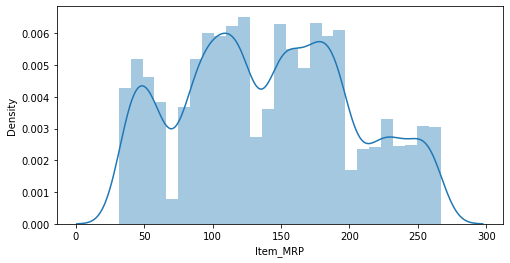

In [18]:
## range of the item Mrp

plt.figure(figsize=(8,4))
sns.distplot(train.Item_MRP)
plt.show()

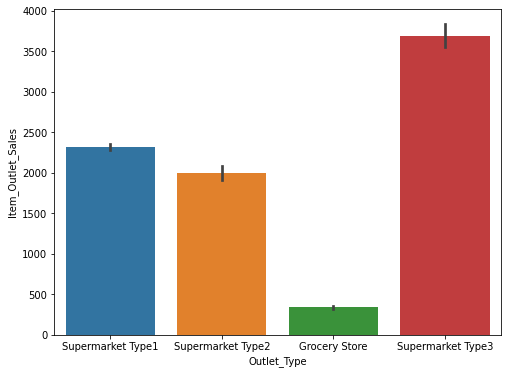

In [19]:
## sales depending upon the Outlet_Type

plt.figure(figsize=(8,6))
sns.barplot(x = train.Outlet_Type, y = train.Item_Outlet_Sales, estimator=np.mean)
plt.show()

### Grocery Store has the lowest Average sales with a very significant percentage

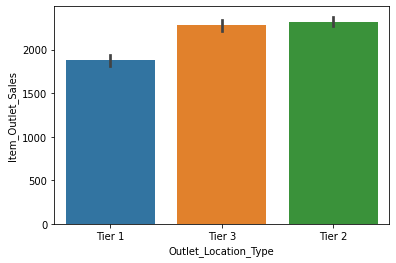

In [20]:
## Outlet_Location_Type

sns.barplot(x = train.Outlet_Location_Type, y = train.Item_Outlet_Sales, estimator=np.mean)
plt.show()

### No such impact of the loaction of the Outlet Location Type over Average sales

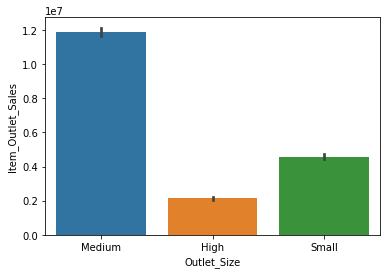

In [21]:
## Outlet_Size

plt.figure(figsize=(6,4))
sns.barplot(x = train.Outlet_Size, y = train.Item_Outlet_Sales, estimator=np.sum)
plt.show()

### As we can see that Maximum Purchasing is done in the Medium size outlets

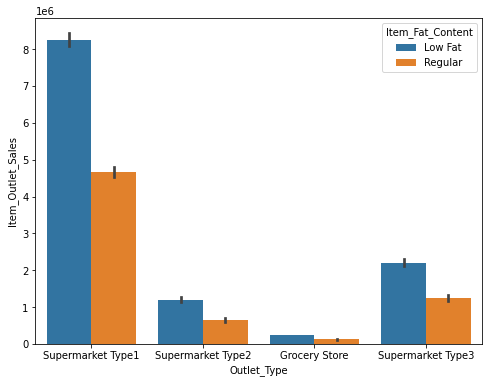

In [22]:
## Item fatcontent

plt.figure(figsize=(8,6))
sns.barplot(x = train.Outlet_Type, y = train.Item_Outlet_Sales, 
            hue = train.Item_Fat_Content, 
            estimator=np.sum)
plt.show()

In [23]:
pd.options.display.float_format = "{:.2f}".format
train.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()

Item_Fat_Content
Low Fat   11904094.53
Regular    6687030.88
Name: Item_Outlet_Sales, dtype: float64

### As we can conclude from above insight that Low Fat purchasing is  more than as compared to Regular Fat Content Products

In [24]:
## Training part starts here
x = train.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2)





In [25]:
def conversionIntoNumerical(train, test, columns):
    for col in columns:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(train[col])
        train[col] = encoder.transform(train[col])
        test[col] = encoder.transform(test[col])
        

In [31]:
#conversionIntoNumerical(train, test, cat_columns)
print(cat_columns)
print(x_train.shape, x_test.shape)
conversionIntoNumerical(x_train, x_test, ['Item_Fat_Content','Item_Type',
                                         'Outlet_Size','Outlet_Location_Type',
                                         'Outlet_Type'])
print(x_train.shape, x_test.shape)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
(6818, 9) (1705, 9)
(6818, 9) (1705, 9)


In [32]:
x_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.00,-0.02,-0.01,0.03,0.03,-0.01,0.00,0.00,-0.00
Item_Fat_Content,-0.02,1.00,0.05,-0.14,0.01,0.00,0.00,-0.00,0.00
Item_Visibility,-0.01,0.05,1.00,-0.03,0.00,-0.08,0.07,-0.03,-0.17
Item_Type,0.03,-0.14,-0.03,1.00,0.04,0.01,-0.00,0.00,-0.01
Item_MRP,0.03,0.01,0.00,0.04,1.00,-0.00,0.00,0.01,0.01
Outlet_Establishment_Year,-0.01,0.00,-0.08,0.01,-0.00,1.00,0.20,-0.09,-0.13
Outlet_Size,0.00,0.00,0.07,-0.00,0.00,0.20,1.00,-0.61,-0.20
Outlet_Location_Type,0.00,-0.00,-0.03,0.00,0.01,-0.09,-0.61,1.00,0.47
Outlet_Type,-0.00,0.00,-0.17,-0.01,0.01,-0.13,-0.20,0.47,1.00


In [34]:
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print( metrics.mean_squared_error(y_test, y_pred)  )

1386238.6358922233


In [35]:
reg = tree.DecisionTreeRegressor()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print( metrics.mean_squared_error(y_test, y_pred)  )

2076845.6341730896


In [41]:
reg = ensemble.RandomForestRegressor()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print( metrics.mean_squared_error(y_test, y_pred)  )

1203492.6164961942


In [37]:
reg = svm.SVR()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print( metrics.mean_squared_error(y_test, y_pred)  )

2845412.69154301


In [42]:
scores = model_selection.cross_val_score(reg, x_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.59369441 0.47677634 0.59535201 0.58939922 0.53077813 0.55623608
 0.59173415 0.57055823 0.50771769 0.58425053]
0.5596496786614484
